<p align="center">
<img src='../../img/VerticaMLPython.png' width="180px">
</p>

# Vertica ML Python Exercise 3

During this exercice, we will:
<ul>
    <li> Draw correlation matrix
    <li> Understand the difference between dependance and correlation
    <li> Understand how to use the correct correlation method
</ul>
## Initialization

Let's create a cursor using the vertica_cursor function

In [1]:
from vertica_ml_python.utilities import vertica_cursor
cur = vertica_cursor("VerticaDSN")

During this study, we will work with the churn dataset. You'll need to read the 'churn.csv' file.

In [2]:
from vertica_ml_python.utilities import read_csv
from vertica_ml_python.utilities import drop_table
drop_table('churn', cur)
churn = read_csv('churn.csv', cur)
print(churn)

The table churn was successfully dropped.
The table public.churn has been successfully created.


,Partner,Dependents,StreamingMovies,PhoneService,TotalCharges,tenure,MonthlyCharges,Contract,gender,PaymentMethod,PaperlessBilling,StreamingTV,Churn,InternetService,DeviceProtection,SeniorCitizen,OnlineSecurity,customerID,OnlineBackup,MultipleLines,TechSupport
0,True,False,No,False,29.850,1,29.850,Month-to-month,Female,Electronic check,True,No,False,DSL,No,0,No,7590-VHVEG,Yes,No phone service,No
1,False,False,No,True,1889.500,34,56.950,One year,Male,Mailed check,False,No,False,DSL,Yes,0,Yes,5575-GNVDE,No,No,No
2,False,False,No,True,108.150,2,53.850,Month-to-month,Male,Mailed check,True,No,True,DSL,No,0,Yes,3668-QPYBK,Yes,No,No
3,False,False,No,False,1840.750,45,42.300,One year,Male,Bank transfer (automatic),False,No,False,DSL,Yes,0,Yes,7795-CFOCW,No,No phone service,Yes
4,False,False,No,True,151.650,2,70.700,Month-to-month,Female,Electronic check,True,No,True,Fiber optic,No,0,No,9237-HQITU,No,No,No
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: churn, Number of rows: 7043, Number of columns: 21


This dataset contains many information of 7043 customers including:
<ul>
    <li><b>customerID: </b>Customer ID
    <li><b>gender: </b>Whether the customer is a male or a female
    <li><b>SeniorCitizen: </b>Whether the customer is a senior citizen or not (1, 0)
    <li><b>Partner: </b>Whether the customer has a partner or not (Yes, No)
    <li><b>Dependents: </b>Whether the customer has dependents or not (Yes, No)
    <li><b>tenure: </b>Number of months the customer has stayed with the company
    <li><b>PhoneService: </b>Whether the customer has a phone service or not (Yes, No)
    <li><b>MultipleLines: </b>Whether the customer has multiple lines or not (Yes, No, No phone service)
    <li><b>InternetService: </b>Customer’s internet service provider (DSL, Fiber optic, No)
    <li><b>OnlineSecurity: </b>Whether the customer has online security or not (Yes, No, No internet service)
    <li><b>OnlineBackup: </b>Whether the customer has online backup or not (Yes, No, No internet service)
    <li><b>DeviceProtection: </b>Whether the customer has device protection or not (Yes, No, No internet service)
    <li><b>TechSupport: </b>Whether the customer has tech support or not (Yes, No, No internet service)
    <li><b>StreamingTV: </b>Whether the customer has streaming TV or not (Yes, No, No internet service)
    <li><b>StreamingMovies: </b>Whether the customer has streaming movies or not (Yes, No, No internet service)
    <li><b>Contract: </b>The contract term of the customer (Month-to-month, One year, Two year)
    <li><b>PaperlessBilling: </b>Whether the customer has paperless billing or not (Yes, No)
    <li><b>PaymentMethod: </b>The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    <li><b>MonthlyCharges: </b>The amount charged to the customer monthly
    <li><b>TotalCharges: </b>The total amount charged to the customer
    <li><b>Churn: </b>Whether the customer churned or not (Yes or No)
</ul>
The purpose is to understand the correlations and dependances between all these variables.

## Correlations and Dependances

Let's explore the data by displaying descriptive statistics of all the columns.

In [3]:
churn.describe(method = "categorical")

,dtype,unique,count,top,top_percent
"""Partner""",boolean,2,7043,f,51.697
"""Dependents""",boolean,2,7043,f,70.041
"""StreamingMovies""",varchar(38),3,7043,No,39.543
"""PhoneService""",boolean,2,7043,t,90.317
"""TotalCharges""","numeric(9,3)",6530,7032,20.200,0.156
"""tenure""",int,73,7043,1,8.704
"""MonthlyCharges""","numeric(8,3)",1585,7043,20.050,0.866
"""Contract""",varchar(28),3,7043,Month-to-month,55.019
"""gender""",varchar(20),2,7043,Male,50.476
"""PaymentMethod""",varchar(50),4,7043,Electronic check,33.579


<object>

Many features are categorical and need to be encoded first. However, it is not needed during this exercice as the main purpose is to understand the different type of correlations. 

<b>Question 1: </b>The linear correlation is computed using the 'pearson' method. Draw the Correlation Matrix using the Pearson coefficient. Explain the linear correlations and dependences between the different features.

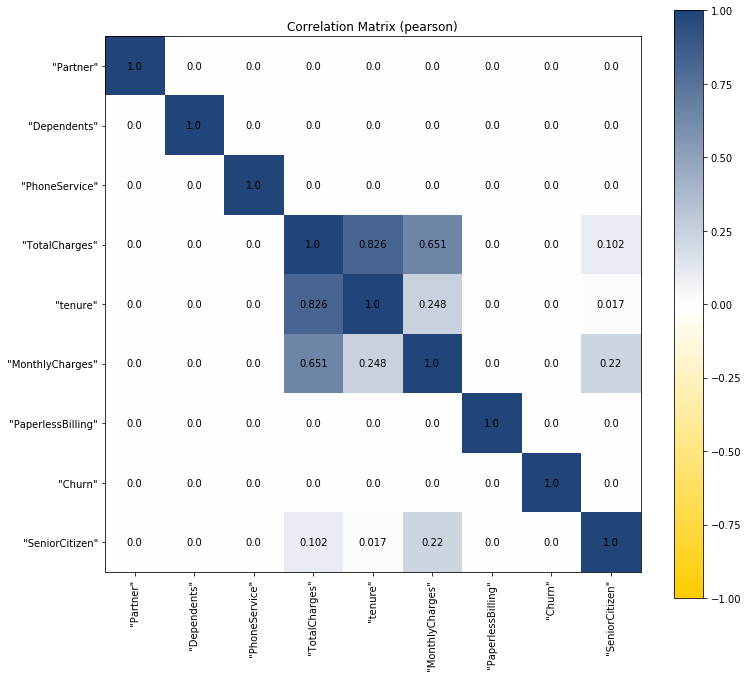

In [4]:
%matplotlib inline
x = churn.corr(method = "pearson")

<p style="color:red">We can notice that the Total Charges are very correlated to the Tenure and the Monthly Charges which make totally sense. The more you subscribed, the more you'll pay. Besides the monthly charges increase during time as at the beginning you'll perhaps benefit to a discount which will expire the next years. </p>

<b>Question 2: </b>There is no perfect way to deal with non-linear correlations between the different features. Spearman coefficients will identify Monotonic relationships between variables. Draw the Correlation Matrix using the Spearman coefficient. Explain the monotonic relationships between the different features.

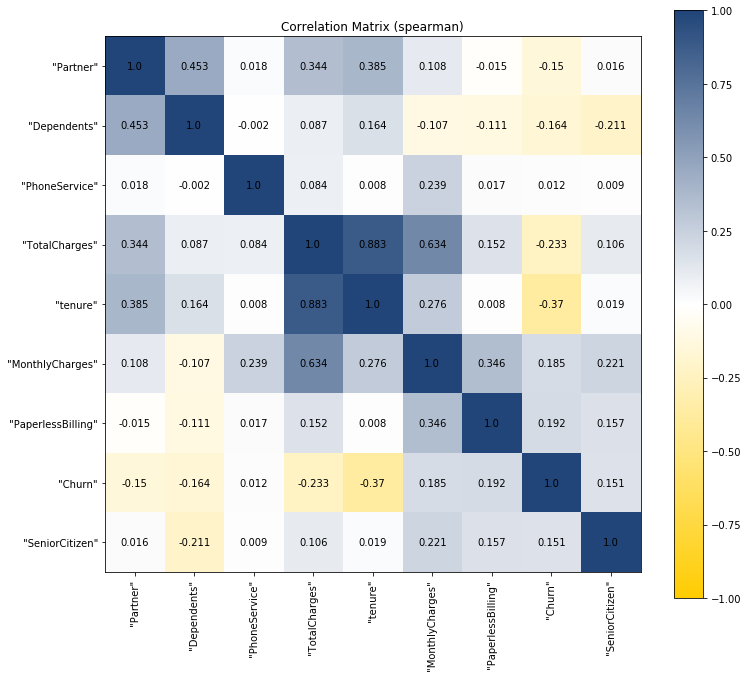

In [5]:
x = churn.corr(method = "spearman")

<p style="color:red">We can notice new links between the variables. For example, customers will less churn if they already subscribed for a long time. People in couple will stay longer with the telco company (they perhaps worry less about the subscription)... We can see some causations like (tenure => MonthlyCharges => TotalCharges)</p>

<b>Question 3: </b>Kendall coefficients can be very expensive to compute but they will bring very useful information. They can explain complex relationship between the different features. Draw the Correlation Matrix using the Kendall coefficient. Explain the relationships between the different features.

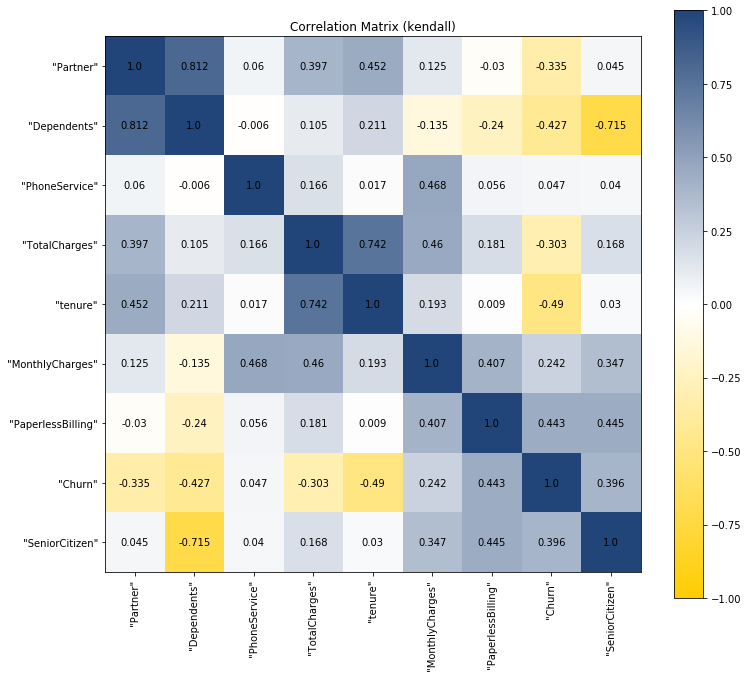

In [6]:
x = churn.corr(method = "kendall")

<p style="color:red">This matrix is very expensive to compute. However, fantastic links can be seen. People paying on line are more subject to churn. Single customers are also more able to churn. Senior Citizen might be more able to churn (are Senior Citizens more lonely than the others ? It makes the causation to the Partner variable).</p>

<b>Question 4: </b>The point Biserial method explains the link between a binary variable and a numerical feature. It can be used only if one of the feature is binary, otherwise it will return 0. Draw the Correlation Matrix using the the point Biserial. In this use-case this method is not very efficient, however do not forget that it is always a possibility.

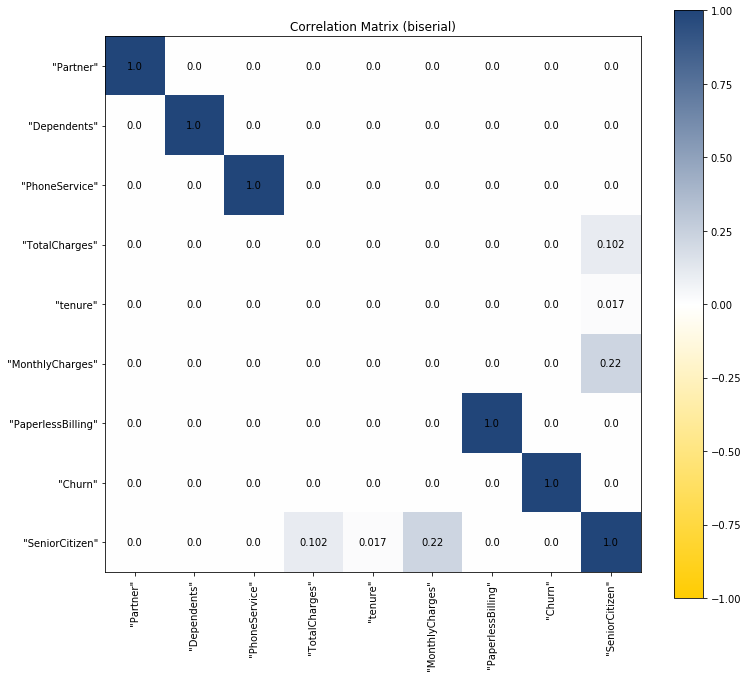

In [7]:
x = churn.corr(method = "biserial")

<b>Question 5: </b>The last technique is the Cramer's V which can explain link between categorical columns. It will range only between 0 and 1. This technique is very important as it helps to understand the link between the categorical features which can represent a huge part of the dataset. Draw the Correlation Matrix using the Cramer's V coefficient. Explain the relationships between the different features.

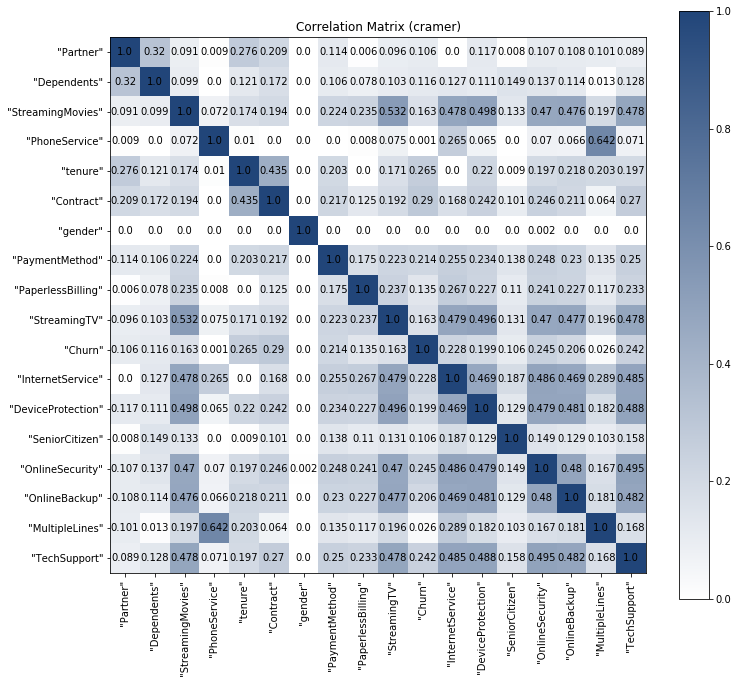

In [8]:
x = churn.corr(method = "cramer")

<p style="color:red">This correlation matrix is really important to compute as it computes the link between categorical features. The type of contract is influencing the 'churn' for example.</p>

<b>Question 6: </b>Explain which features will be useful to predict churn and what type of ML algorithms you will probably not use for the prediction.

<p style="color:red">We found many features to predict churn in the previous questions. We will not use linear ML algorithm as most of the links are not linear. Except if we do a data encoding of many variables, algorithms which can not handle missing values will not be able to solve the problem. Having these information, a Random Forest could be a very good choice.</p>